In [3]:
import anndata
import scanpy as sc 
import pandas as pd 

In [4]:
from scButterfly.butterfly import Butterfly
butterfly = Butterfly()

In [10]:
adata_selina = anndata.read_h5ad("Selina_adrenal_medula_normal_hg38.h5ad")
adata_selina

AnnData object with n_obs × n_vars = 10738 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'CC.Difference', 'RNA_snn_res.1', 'seurat_clusters', 'pANN_0.25_0.26_905', 'DF.classifications_0.25_0.26_905', 'pANN_0.25_0.26_1131', 'DF.classifications_0.25_0.26_1131', 'timepoint', 'timepoint2', 'doublet8', 'doublet10', 'pANN_0.25_0.005_878', 'DF.classifications_0.25_0.005_878', 'pANN_0.25_0.05_878', 'DF.classifications_0.25_0.05_878', 'pANN_0.25_0.05_1098', 'DF.classifications_0.25_0.05_1098', 'pANN_0.25_0.005_222', 'DF.classifications_0.25_0.005_222', 'pANN_0.25_0.005_277', 'DF.classifications_0.25_0.005_277', 'RNA_snn_res.1.2', 'pANN_0.25_0.005_0', 'DF.classifications_0.25_0.005_0', 'pANN_0.25_0.3_774', 'DF.classifications_0.25_0.3_774', 'pANN_0.25_0.3_619', 'DF.classifications_0.25_0.3_619', 'pANN_0.25_0.02_0', 'DF.classifications_0.25_0.02_0', 'pANN_0.25_0.18_115', 'DF.classifications_0.25_0.18_115', 'pANN_0.25_0.18_

In [7]:
adata_RNA = anndata.read_h5ad("Normal_multiom_samples_RNA.h5ad")
adata_ATAC = anndata.read_h5ad("Normal_multiom_samples_ATAC.h5ad")

In [9]:
adata_RNA

AnnData object with n_obs × n_vars = 14650 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'ATAC.weight', 'wsnn_res.0.8', 'seurat_clusters'
    var: 'features'

In [139]:
adata_ATAC

AnnData object with n_obs × n_vars = 14650 × 207394
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'ATAC.weight', 'wsnn_res.0.8', 'seurat_clusters', 'sample', 'cell', 'integrated_snn_res.0.5', 'integrated.weight'
    var: 'count', 'percentile'
    obsm: 'X_lsi', 'X_umap', 'X_umap.atac', 'X_wnn.umap'
    varm: 'LSI'

In [11]:
import pandas as pd
RNA_table = pd.read_table("Normal_multiom_adrenal_medula_annot_pseudotime_RNA.csv", delimiter=",")

In [12]:
RNA_table = RNA_table.loc[RNA_table.study != "Selina",]

In [13]:
RNA_table["sample"] = RNA_table["sample"].str[2:]

In [14]:
RNA_table["name"] = RNA_table["sample"] + "_" + RNA_table["Unnamed: 0"].str[:-2]

In [15]:
RNA_table.index = RNA_table["name"]

In [16]:
adata_RNA = adata_RNA[RNA_table["name"],]
adata_ATAC = adata_ATAC[RNA_table["name"],]

In [17]:
adata_RNA.obs["cell_type"] = RNA_table["C_scANVI"]
adata_ATAC.obs["cell_type"] = RNA_table["C_scANVI"]

/tmp/ipykernel_17/1378054226.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_RNA.obs["cell_type"] = RNA_table["C_scANVI"]
/tmp/ipykernel_17/1378054226.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ATAC.obs["cell_type"] = RNA_table["C_scANVI"]


In [18]:
adata_RNA.obs["cell_type"] = adata_RNA.obs.cell_type.astype('category')
adata_ATAC.obs["cell_type"] = adata_ATAC.obs.cell_type.astype('category')

In [19]:
adata_selina.obs['cell_type'] = adata_selina.obs['celltype']

In [20]:
joined_RNA = anndata.concat([adata_selina, adata_RNA], join = 'outer')

In [66]:
joined_RNA.write('selina_multiome_normal.h5ad')

In [4]:
joined_rna

AnnData object with n_obs × n_vars = 12719 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'CC.Difference', 'RNA_snn_res.1', 'seurat_clusters', 'pANN_0.25_0.26_905', 'DF.classifications_0.25_0.26_905', 'pANN_0.25_0.26_1131', 'DF.classifications_0.25_0.26_1131', 'timepoint', 'timepoint2', 'doublet8', 'doublet10', 'pANN_0.25_0.005_878', 'DF.classifications_0.25_0.005_878', 'pANN_0.25_0.05_878', 'DF.classifications_0.25_0.05_878', 'pANN_0.25_0.05_1098', 'DF.classifications_0.25_0.05_1098', 'pANN_0.25_0.005_222', 'DF.classifications_0.25_0.005_222', 'pANN_0.25_0.005_277', 'DF.classifications_0.25_0.005_277', 'RNA_snn_res.1.2', 'pANN_0.25_0.005_0', 'DF.classifications_0.25_0.005_0', 'pANN_0.25_0.3_774', 'DF.classifications_0.25_0.3_774', 'pANN_0.25_0.3_619', 'DF.classifications_0.25_0.3_619', 'pANN_0.25_0.02_0', 'DF.classifications_0.25_0.02_0', 'pANN_0.25_0.18_115', 'DF.classifications_0.25_0.18_115', 'pANN_0.25_0.18_

In [67]:
adata_ATAC.write('atac_multiome_normal.h5ad')

In [3]:
import anndata 
import pandas as pd

ATAC_data = anndata.read_h5ad('atac_multiome_normal.h5ad')
RNA_data = anndata.read_h5ad('selina_multiome_normal.h5ad')
RNA_data.obs.index = pd.Series([str(i) for i in range(len(RNA_data.obs.index))])
ATAC_data.obs.index = pd.Series([str(i) for i in range(len(ATAC_data.obs.index))])

In [4]:
from scButterfly.data_processing import RNA_data_preprocessing, ATAC_data_preprocessing

In [5]:
RNA_data = RNA_data_preprocessing(
    RNA_data,
    normalize_total=True,
    log1p=True,
    use_hvg=True,
    n_top_genes=3000,
    save_data=True,
    file_path='./processed_data/',
    logging_path=None
    )
ATAC_data = ATAC_data_preprocessing(
    ATAC_data,
    binary_data=True,
    filter_features=True,
    fpeaks=0.005,
    tfidf=True,
    normalize=True,
    save_data=True,
    file_path='./processed_data/',
    logging_path=None
)[0]


[INFO] RNA preprocessing: normalize size factor.
[INFO] RNA preprocessing: log transform RNA data.
[INFO] RNA preprocessing: choose top 3000 genes for following training.
[WARNING] RNA preprocessing: writing processed RNA data to target file.
[INFO] ATAC preprocessing: binarizing data.
[INFO] ATAC preprocessing: filter out peaks appear lower than 0.5% cells.
[INFO] ATAC preprocessing: TF-IDF transformation.
[INFO] ATAC preprocessing: normalizing data.
[WARNING] ATAC preprocessing: writing processed ATAC data to target file.


In [6]:
import importlib
import scButterfly.split_datasets

importlib.reload(scButterfly.split_datasets)

from scButterfly.split_datasets import unpaired_split_dataset_fixed_rna
id_list = unpaired_split_dataset_fixed_rna(RNA_data, ATAC_data)
train_id_r, train_id_a, validation_id_r, validation_id_a, test_id_r, test_id_a = id_list[0]

In [7]:
import pandas as pd

genes = ATAC_data.var.index 
chromosomes = genes.str.extract(r'^(chr[^\-]+)')[0] 
ATAC_data.var['chrom'] = pd.Categorical(chromosomes)
print(ATAC_data.var['chrom'])


chr1-9740-10690           chr1
chr1-180667-181593        chr1
chr1-183927-184810        chr1
chr1-186501-187454        chr1
chr1-191039-192029        chr1
                          ... 
chrY-11332293-11334390    chrY
chrY-11721558-11722457    chrY
chrY-11747255-11748160    chrY
chrY-56829078-56830130    chrY
chrY-56849698-56851479    chrY
Name: chrom, Length: 151818, dtype: category
Categories (24, object): ['chr1', 'chr10', 'chr11', 'chr12', ..., 'chr8', 'chr9', 'chrX', 'chrY']


In [8]:
chrom_list = []
last_one = ''
for i in range(len(ATAC_data.var['chrom'])):
    temp = ATAC_data.var['chrom'][i]
    if temp[0 : 3] == 'chr':
        if not temp == last_one:
            chrom_list.append(1)
            last_one = temp
        else:
            chrom_list[-1] += 1
    else:
        chrom_list[-1] += 1
        


print(chrom_list, end="")

[14209, 12170, 9515, 6603, 8336, 8214, 8060, 7066, 6715, 7773, 8160, 7210, 4141, 4731, 5002, 5438, 6878, 3536, 5074, 4547, 1694, 3356, 3371, 19]

In [9]:
import pandas as pd

# Initialize variables
chrom_list = []
group_indices = []  # Will store the chromosome group index for each peak
cumulative_indices = []  # Will store the cumulative index for each peak
last_one = ''
group_count = -1  # Group index counter
cumulative_count = 0  # Cumulative peak counter

# Loop through chromosome names
for i, temp in enumerate(ATAC_data.var['chrom']):
    # Start new chromosome group if needed
    if temp[0:3] == 'chr':
        if temp != last_one:
            group_count += 1  # Start a new group
            chrom_list.append(1)
            last_one = temp
        else:
            chrom_list[-1] += 1
    else:
        chrom_list[-1] += 1
    
    # Record group index and cumulative index for each peak
    group_indices.append(group_count)
    cumulative_indices.append(cumulative_count)
    cumulative_count += 1

# Create the DataFrame
peak_info_df = pd.DataFrame({
    'full_peak_name': ATAC_data.var['chrom'],
    'group_index': group_indices,
    'cumulative_index': cumulative_indices
})

# Print sample results
print(peak_info_df.head())

# Save to CSV if needed
peak_info_df.to_csv('peak_info.csv', index=True)


                   full_peak_name  group_index  cumulative_index
chr1-9740-10690              chr1            0                 0
chr1-180667-181593           chr1            0                 1
chr1-183927-184810           chr1            0                 2
chr1-186501-187454           chr1            0                 3
chr1-191039-192029           chr1            0                 4


In [10]:
sum(chrom_list)

151818

In [11]:
from scButterfly.train_model import Model
import torch
import torch.nn as nn

In [12]:

RNA_input_dim = len([i for i in RNA_data.var['highly_variable'] if i])
ATAC_input_dim = ATAC_data.X.shape[1]

R_kl_div = 1 / RNA_input_dim * 20
A_kl_div = 1 / ATAC_input_dim * 20
kl_div = R_kl_div + A_kl_div

In [14]:
model = Model(
    R_encoder_nlayer = 2,
    A_encoder_nlayer = 2,
    R_decoder_nlayer = 2,
    A_decoder_nlayer = 2,
    R_encoder_dim_list = [RNA_input_dim, 256, 128],
    A_encoder_dim_list = [ATAC_input_dim, 32 * len(chrom_list), 128],
    R_decoder_dim_list = [128, 256, RNA_input_dim],
    A_decoder_dim_list = [128, 32 * len(chrom_list), ATAC_input_dim],
    R_encoder_act_list = [nn.LeakyReLU(), nn.LeakyReLU()],
    A_encoder_act_list = [nn.LeakyReLU(), nn.LeakyReLU()],
    R_decoder_act_list = [nn.LeakyReLU(), nn.LeakyReLU()],
    A_decoder_act_list = [nn.LeakyReLU(), nn.Sigmoid()],
    translator_embed_dim = 128,
    translator_input_dim_r = 128,
    translator_input_dim_a = 128,
    translator_embed_act_list = [nn.LeakyReLU(), nn.LeakyReLU(), nn.LeakyReLU()],
    discriminator_nlayer = 1,
    discriminator_dim_list_R = [128],
    discriminator_dim_list_A = [128],
    discriminator_act_list = [nn.Sigmoid()],
    dropout_rate = 0.1,
    R_noise_rate = 0.5,
    A_noise_rate = 0.3,
    chrom_list = chrom_list,
    logging_path = None,
    RNA_data = RNA_data,
    ATAC_data = ATAC_data
)

In [79]:

model.train(
    R_encoder_lr = 0.001,
    A_encoder_lr = 0.001,
    R_decoder_lr = 0.001,
    A_decoder_lr = 0.001,
    R_translator_lr = 0.001,
    A_translator_lr = 0.001,
    translator_lr = 0.001,
    discriminator_lr = 0.005,
    R2R_pretrain_epoch = 100,
    A2A_pretrain_epoch = 100,
    lock_encoder_and_decoder = False,
    translator_epoch = 200,
    patience = 50,
    batch_size = 64,
    r_loss = nn.MSELoss(size_average=True),
    a_loss = nn.BCELoss(size_average=True),
    d_loss = nn.BCELoss(size_average=True),
    loss_weight = [1, 2, 1, R_kl_div, A_kl_div, kl_div],
    train_id_r = train_id_r,
    train_id_a = train_id_a,
    validation_id_r = validation_id_r,
    validation_id_a = validation_id_a,
    output_path = './normal_cells_unpaired',
    seed = 19193,
    kl_mean = True,
    R_pretrain_kl_warmup = 50,
    A_pretrain_kl_warmup = 50,
    translation_kl_warmup = 50,
    load_model = None,
    logging_path = './normal_cells_unpaired'
)

[INFO] Trainer: RNA pretraining ...
RNA pretrain: 100%|█████████████████████| 100/100 [08:22<00:00,  5.02s/it, train=0.0434, val=0.0463]
[INFO] Trainer: ATAC pretraining ...
ATAC pretrain: 100%|████████████████████| 100/100 [08:48<00:00,  5.29s/it, train=0.1897, val=0.1903]
[INFO] Trainer: Integrative training ...
Integrative training: 100%|█████████████| 200/200 [22:44<00:00,  6.82s/it, train=0.1858, val=0.1556]


In [36]:
R2A_predict = model.test(
    test_id_r = test_id_r,
    batch_size = 64,
    model_path = './normal_cells_unpaired',
    load_model = True,
    output_path = None,
    test_cluster = False,
    test_figure = False,
    output_data = False,
    return_predict = True
)

[INFO] Tester: load trained model from path: ./normal_cells_unpaired/model
[INFO] Tester: get predicting ...
RNA to ATAC predicting...: 100%|██████████████████████████████████| 168/168 [00:12<00:00, 13.98it/s]
[INFO] Tester: calculate neighbors graph for following test ...


In [161]:
R2A_predict.obs['wsnn_res.0.8'] = R2A_predict.obs['wsnn_res.0.8'].astype('float64')
R2A_predict.obs['batch'] = 'predicted'
R2A_predict.var.index = ATAC_data.var_names
R2A_predict.write('./results/prediction_atac_from_rna_selina_normal.h5ad')

In [114]:
ATAC_data.obs['batch'] = 'real'
sc.tl.pca(ATAC_data, n_comps=50)
ATAC_data.write('./processed_data/atac_normal_pca.h5ad')

AnnData object with n_obs × n_vars = 1981 × 207394
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'ATAC.weight', 'wsnn_res.0.8', 'seurat_clusters', 'sample', 'cell', 'integrated_snn_res.0.5', 'integrated.weight', 'cell_type'
    var: 'count', 'percentile'
    uns: 'pca'
    obsm: 'X_lsi', 'X_umap', 'X_umap.atac', 'X_wnn.umap', 'X_pca'
    varm: 'LSI', 'PCs'

In [117]:
ATAC_data.obsm['X_pca']

array([[-26.414257  ,   8.724374  ,  -3.8224623 , ...,  -0.10531413,
         -0.5314007 ,   0.2196101 ],
       [-30.91643   ,  -3.663466  ,  -8.362504  , ...,  -0.13212356,
         -2.1841376 ,   0.31835297],
       [-16.501457  ,  33.6891    ,  16.152855  , ...,   0.96170896,
          1.8574007 ,  -1.5313922 ],
       ...,
       [-31.860386  , -10.50474   , -18.98336   , ...,  -0.21289746,
         -0.1278094 ,  -0.23695694],
       [-29.803041  , -23.318695  ,  15.587897  , ...,   0.06075066,
          0.6657487 ,  -0.8692569 ],
       [-14.581209  ,   4.7810707 ,   2.3379743 , ...,  -0.6151322 ,
          0.71417576,   0.7041953 ]], dtype=float32)

In [ ]:
merged_atac = anndata.concat([R2A_predict, ATAC_data], join = 'outer')

In [ ]:
merged_atac.obs['wsnn_res.0.8'] = R2A_predict.obs['wsnn_res.0.8'].astype('float64')
merged_atac.obs['seurat_clusters'] = R2A_predict.obs['seurat_clusters'].astype('float64')

merged_atac.write('./results/merged_atac_normal.h5ad')

In [10]:
from scButterfly.calculate_cluster import calculate_cluster_index

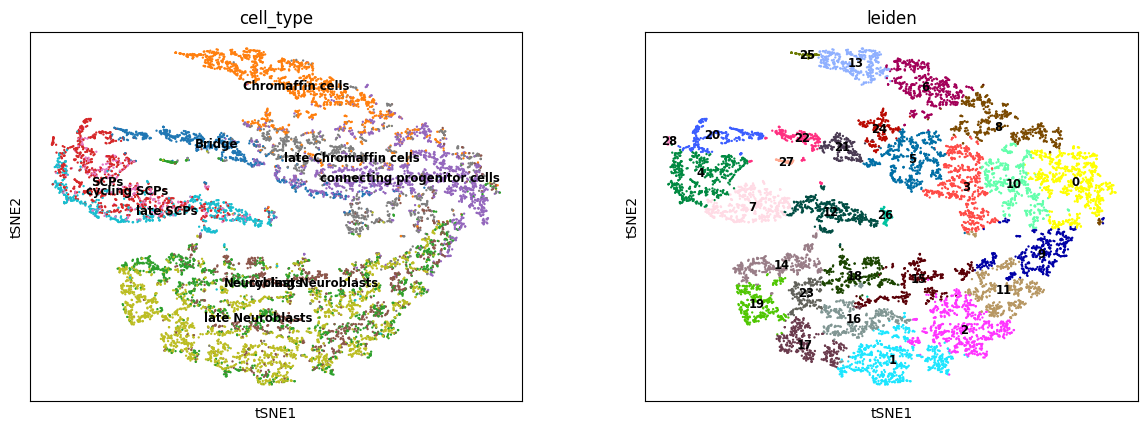

In [86]:
sc.tl.tsne(R2A_predict)
sc.tl.leiden(R2A_predict)
sc.pl.tsne(R2A_predict, color=['cell_type', 'leiden'], legend_loc='on data', legend_fontsize='small', save='R2A_normal.pdf')

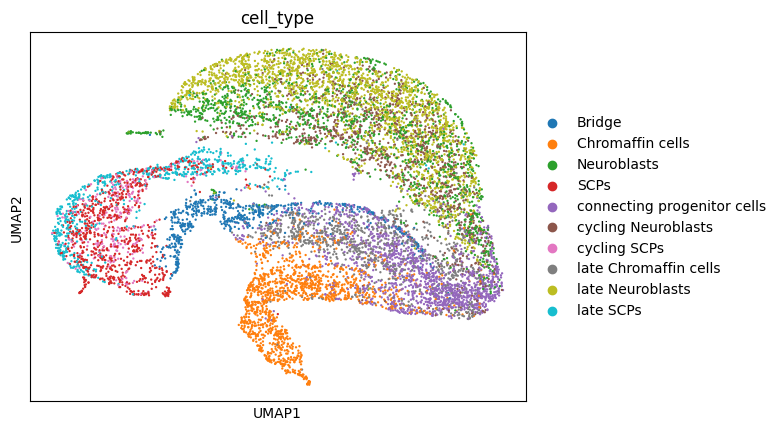

In [87]:
sc.pp.neighbors(R2A_predict, use_rep='X_pca', n_pcs=50)
sc.tl.umap(R2A_predict)
sc.pl.umap(R2A_predict, color='cell_type', save='R2A_normal.pdf')

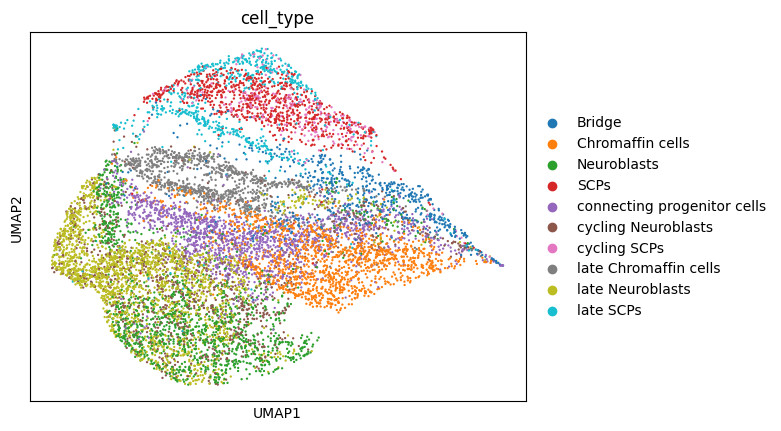

In [88]:
import scanpy as sc
sc.tl.pca(adata_selina, n_comps=50)
sc.pp.neighbors(adata_selina, use_rep='X_pca', n_pcs=50)
sc.tl.umap(adata_selina)
sc.pl.umap(adata_selina, color='cell_type', save='RNA_selina.pdf')

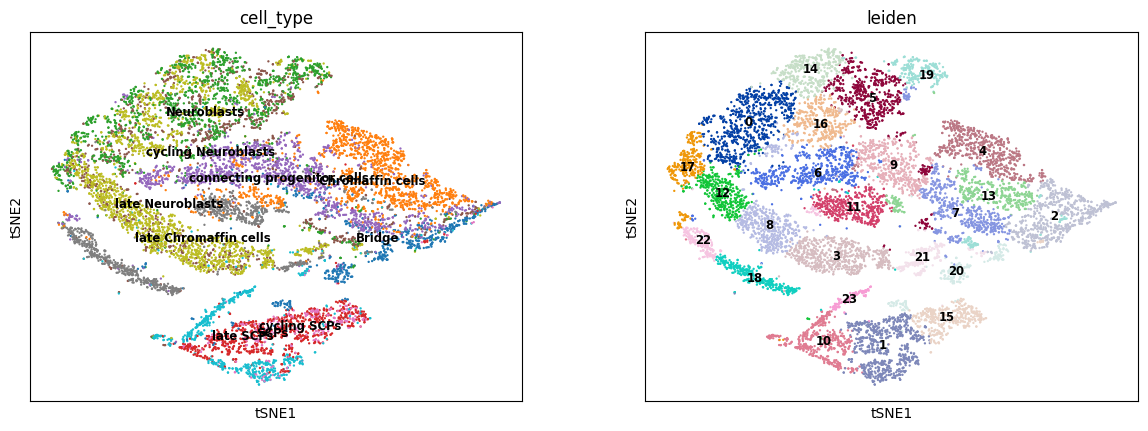

In [89]:
sc.tl.tsne(adata_selina)
sc.tl.leiden(adata_selina)
sc.pl.tsne(adata_selina, color=['cell_type', 'leiden'], legend_loc='on data', legend_fontsize='small', save='RNA_selina.pdf')

In [5]:
ARI, AMI, NMI, HOM = calculate_cluster_index(R2A_predict)
print('RNA to ATAC:\nARI: %.3f, \tAMI: %.3f, \tNMI: %.3f, \tHOM: %.3f' % (ARI, AMI, NMI, HOM))

RNA to ATAC:
ARI: 0.196, 	AMI: 0.458, 	NMI: 0.461, 	HOM: 0.568


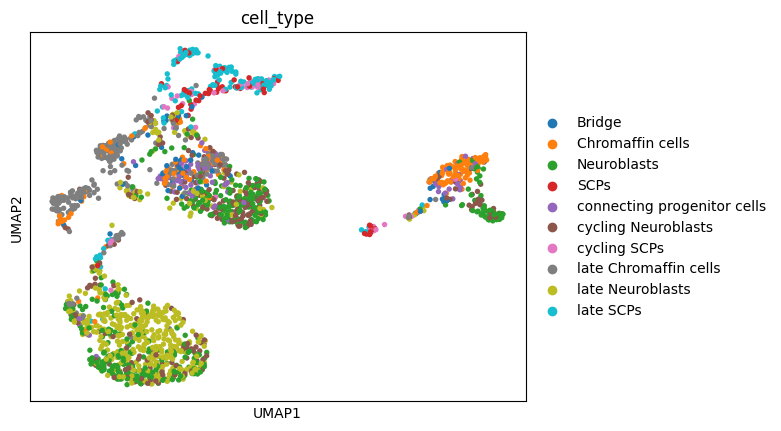

In [3]:
import scanpy as sc
sc.pp.neighbors(ATAC_data, use_rep='X_pca', n_pcs=50)
sc.tl.umap(ATAC_data)
sc.pl.umap(ATAC_data, color='cell_type', save='atac_normal.pdf')

/tmp/ipykernel_1213/3169235022.py:5: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(ATAC_data)


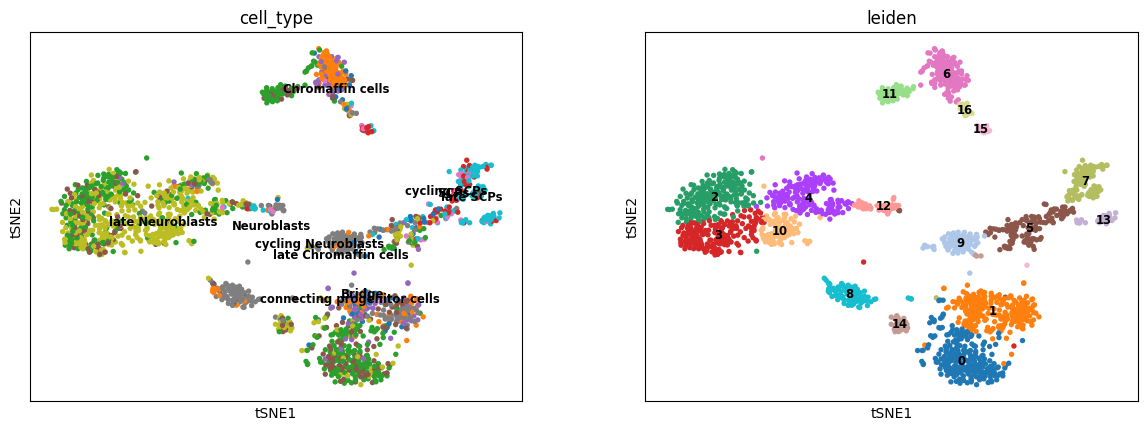

In [4]:
import scanpy as sc

sc.tl.tsne(ATAC_data)
sc.pp.neighbors(ATAC_data, use_rep='X_pca', n_pcs=50)
sc.tl.leiden(ATAC_data)
sc.pl.tsne(ATAC_data, color=['cell_type', 'leiden'], legend_loc='on data', legend_fontsize='small', save='atac_normal.pdf')

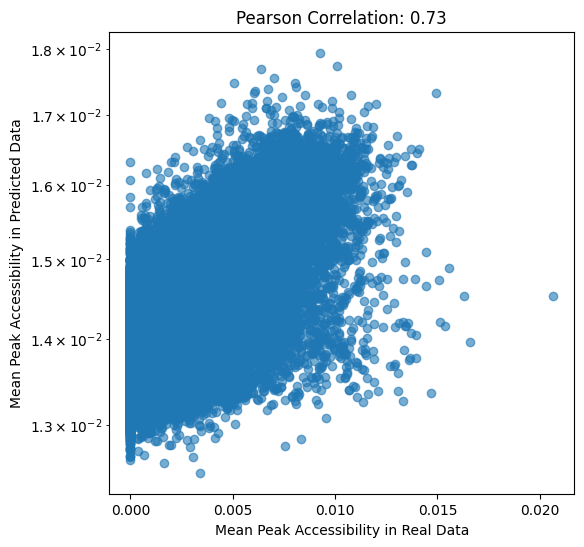

In [7]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Define cell type of interest
cell_type_of_interest = "Bridge"

# Subset based on cell type
bridge_real = ATAC_data[ATAC_data.obs['cell_type'] == cell_type_of_interest]
bridge_pred = R2A_predict[R2A_predict.obs['cell_type'] == cell_type_of_interest]


# Convert sparse matrix to dense and compute mean peak accessibility per peak
expr_real = bridge_real.X.A.mean(axis=0)  # Using .A for sparse matrix
expr_pred = bridge_pred.X.A.mean(axis=0)

# Compute Pearson correlation
corr, _ = pearsonr(expr_real, expr_pred)

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(expr_real, expr_pred, alpha=0.6)
plt.xlabel("Mean Peak Accessibility in Real Data")
plt.yscale("log")
plt.ylabel("Mean Peak Accessibility in Predicted Data")
plt.title(f"Pearson Correlation: {corr:.2f}")
plt.show()


In [8]:
import numpy as np
from scipy.stats import entropy

kl_div = entropy(expr_real, expr_pred)  

print(f"KL Divergence: {kl_div}")


KL Divergence: 1.0059552062601789


In [1]:
import anndata 
import numpy as np 
from scipy.stats import entropy 

rna = anndata.read_h5ad('Normal_multiom_samples_RNA.h5ad')
rna_selina = anndata.read_h5ad('Selina_adrenal_medula_normal_hg38.h5ad')

AnnData object with n_obs × n_vars = 10738 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'CC.Difference', 'RNA_snn_res.1', 'seurat_clusters', 'pANN_0.25_0.26_905', 'DF.classifications_0.25_0.26_905', 'pANN_0.25_0.26_1131', 'DF.classifications_0.25_0.26_1131', 'timepoint', 'timepoint2', 'doublet8', 'doublet10', 'pANN_0.25_0.005_878', 'DF.classifications_0.25_0.005_878', 'pANN_0.25_0.05_878', 'DF.classifications_0.25_0.05_878', 'pANN_0.25_0.05_1098', 'DF.classifications_0.25_0.05_1098', 'pANN_0.25_0.005_222', 'DF.classifications_0.25_0.005_222', 'pANN_0.25_0.005_277', 'DF.classifications_0.25_0.005_277', 'RNA_snn_res.1.2', 'pANN_0.25_0.005_0', 'DF.classifications_0.25_0.005_0', 'pANN_0.25_0.3_774', 'DF.classifications_0.25_0.3_774', 'pANN_0.25_0.3_619', 'DF.classifications_0.25_0.3_619', 'pANN_0.25_0.02_0', 'DF.classifications_0.25_0.02_0', 'pANN_0.25_0.18_115', 'DF.classifications_0.25_0.18_115', 'pANN_0.25_0.18_

In [9]:
expr_rna = rna.X.A.mean(axis=0)
expr_rna_selina = rna_selina.X.A.mean(axis=0)

kl_div = entropy(expr_rna, expr_rna_selina)

print(f"KL divergence: {kl_div}")

KL divergence: inf


['0.000 - 0.001', '0.001 - 0.002', '0.002 - 0.003', '0.003 - 0.004', '0.004 - 0.005', '0.005 - 0.006', '0.006 - 0.007', '0.007 - 0.008', '0.008 - 0.009', '0.009 - 0.010', '0.010 - 0.011', '0.011 - 0.012', '0.012 - 0.013', '0.013 - 0.014', '0.014 - 0.015', '0.015 - 0.016', '0.016 - 0.017', '0.017 - 0.018', '0.018 - 0.019']


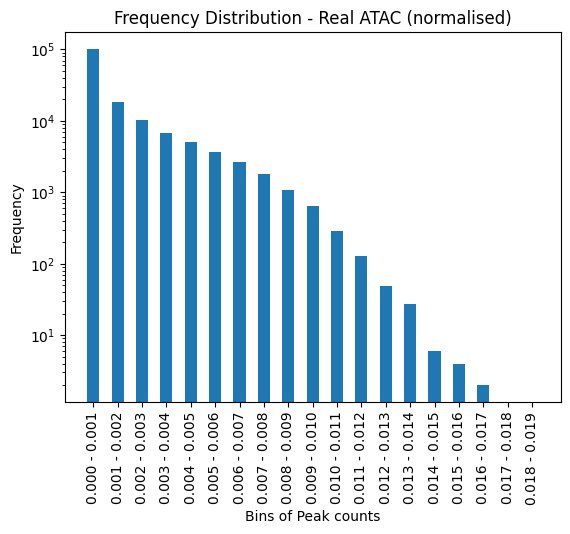

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: 100 random values between 0 and 1
data = expr_real

# Define bins using np.arange() with a step of 0.01
bins = np.arange(0, 0.02, 0.001)

# Define labels for the bins in the format 'start - end'
labels = [f"{bins[i]:.3f} - {bins[i+1]:.3f}" for i in range(len(bins) - 1)]

# Display the labels
print(labels)
# Compute the histogram using numpy
hist, _ = np.histogram(data, bins=bins)

# Plot the histogram as a bar chart
plt.bar(range(len(hist)), hist, tick_label=labels, width=0.5)
plt.xlabel('Bins of Peak counts')
plt.ylabel('Frequency')
plt.yscale("log")
plt.title('Frequency Distribution - Real ATAC (normalised)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


['0.000 - 0.001', '0.001 - 0.002', '0.002 - 0.003', '0.003 - 0.004', '0.004 - 0.005', '0.005 - 0.006', '0.006 - 0.007', '0.007 - 0.008', '0.008 - 0.009', '0.009 - 0.010', '0.010 - 0.011', '0.011 - 0.012', '0.012 - 0.013', '0.013 - 0.014', '0.014 - 0.015', '0.015 - 0.016', '0.016 - 0.017', '0.017 - 0.018', '0.018 - 0.019']


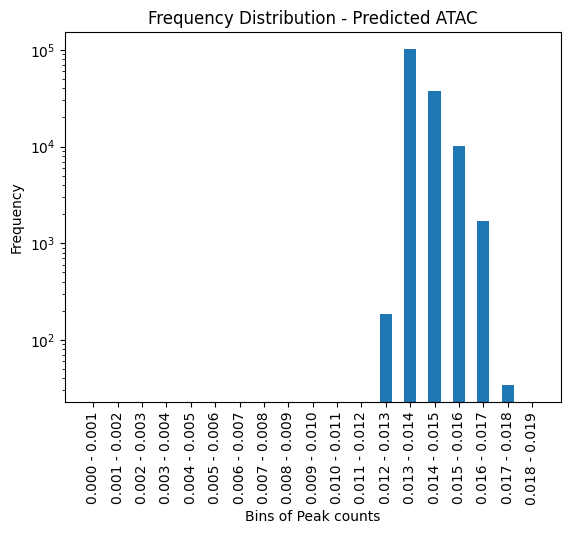

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: 100 random values between 0 and 1
data = expr_pred

# Define bins using np.arange() with a step of 0.01
bins = np.arange(0, 0.02, 0.001)

# Define labels for the bins in the format 'start - end'
labels = [f"{bins[i]:.3f} - {bins[i+1]:.3f}" for i in range(len(bins) - 1)]

# Display the labels
print(labels)
# Compute the histogram using numpy
hist, _ = np.histogram(data, bins=bins)

# Plot the histogram as a bar chart
plt.bar(range(len(hist)), hist, tick_label=labels, width=0.5)
plt.xlabel('Bins of Peak counts')
plt.ylabel('Frequency')
plt.yscale("log")
plt.title('Frequency Distribution - Predicted ATAC')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


In [13]:
real_atac = anndata.read_h5ad('atac_multiome_normal.h5ad')
real_atac

AnnData object with n_obs × n_vars = 1981 × 207394
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'ATAC.weight', 'wsnn_res.0.8', 'seurat_clusters', 'sample', 'cell', 'integrated_snn_res.0.5', 'integrated.weight', 'cell_type'
    var: 'count', 'percentile'
    obsm: 'X_lsi', 'X_umap', 'X_umap.atac', 'X_wnn.umap'
    varm: 'LSI'

In [14]:
import episcanpy as epi 
fpeaks = 0.005
epi.pp.filter_features(real_atac, min_cells=np.ceil(fpeaks*real_atac.shape[0]))

In [15]:
real_atac

AnnData object with n_obs × n_vars = 1981 × 151818
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'ATAC.weight', 'wsnn_res.0.8', 'seurat_clusters', 'sample', 'cell', 'integrated_snn_res.0.5', 'integrated.weight', 'cell_type'
    var: 'count', 'percentile', 'n_cells'
    obsm: 'X_lsi', 'X_umap', 'X_umap.atac', 'X_wnn.umap'
    varm: 'LSI'

In [7]:
predicted_atac_processed = anndata.read_h5ad('./processed_data/binarize_True_filter_False_tfidf_True_normalize_True_ATAC_processed_data.h5ad')

predicted_atac_processed

AnnData object with n_obs × n_vars = 10738 × 151818
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'CC.Difference', 'RNA_snn_res.1', 'seurat_clusters', 'pANN_0.25_0.26_905', 'DF.classifications_0.25_0.26_905', 'pANN_0.25_0.26_1131', 'DF.classifications_0.25_0.26_1131', 'timepoint', 'timepoint2', 'doublet8', 'doublet10', 'pANN_0.25_0.005_878', 'DF.classifications_0.25_0.005_878', 'pANN_0.25_0.05_878', 'DF.classifications_0.25_0.05_878', 'pANN_0.25_0.05_1098', 'DF.classifications_0.25_0.05_1098', 'pANN_0.25_0.005_222', 'DF.classifications_0.25_0.005_222', 'pANN_0.25_0.005_277', 'DF.classifications_0.25_0.005_277', 'RNA_snn_res.1.2', 'pANN_0.25_0.005_0', 'DF.classifications_0.25_0.005_0', 'pANN_0.25_0.3_774', 'DF.classifications_0.25_0.3_774', 'pANN_0.25_0.3_619', 'DF.classifications_0.25_0.3_619', 'pANN_0.25_0.02_0', 'DF.classifications_0.25_0.02_0', 'pANN_0.25_0.18_115', 'DF.classifications_0.25_0.18_115', 'pANN_0.25_0.18

['0.000 - 0.001', '0.001 - 0.002', '0.002 - 0.003', '0.003 - 0.004', '0.004 - 0.005', '0.005 - 0.006', '0.006 - 0.007', '0.007 - 0.008', '0.008 - 0.009', '0.009 - 0.010', '0.010 - 0.011', '0.011 - 0.012', '0.012 - 0.013', '0.013 - 0.014', '0.014 - 0.015', '0.015 - 0.016', '0.016 - 0.017', '0.017 - 0.018', '0.018 - 0.019']


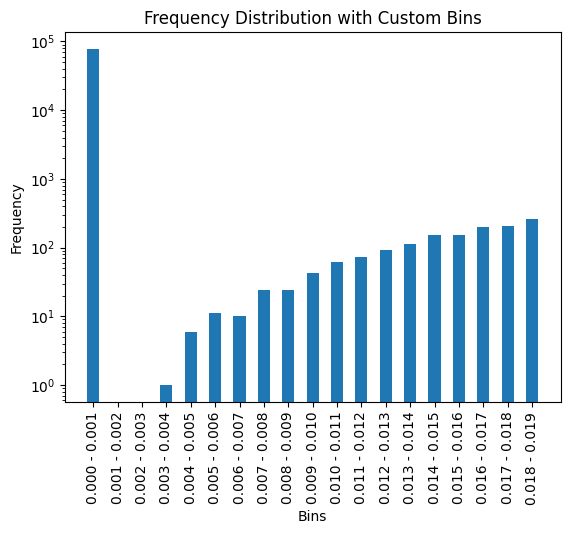

In [18]:
import numpy as np
import matplotlib.pyplot as plt

cell_type_of_interest = 'Bridge'
bridge_real_tweaked = real_atac[real_atac.obs['cell_type'] == cell_type_of_interest]

expr_real_tweaked = bridge_real_tweaked.X.A.mean(axis=0)  # Using .A for sparse matrix
data = expr_real_tweaked

# Define bins using np.arange() with a step of 0.01
bins = np.arange(0, 0.02, 0.001)

# Define labels for the bins in the format 'start - end'
labels = [f"{bins[i]:.3f} - {bins[i+1]:.3f}" for i in range(len(bins) - 1)]

# Display the labels
print(labels)
# Compute the histogram using numpy
hist, _ = np.histogram(data, bins=bins)

# Plot the histogram as a bar chart
plt.bar(range(len(hist)), hist, tick_label=labels, width=0.5)
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.yscale("log")
plt.title('Frequency Distribution with Custom Bins')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


['0.000 - 0.001', '0.001 - 0.002', '0.002 - 0.003', '0.003 - 0.004', '0.004 - 0.005', '0.005 - 0.006', '0.006 - 0.007', '0.007 - 0.008', '0.008 - 0.009', '0.009 - 0.010', '0.010 - 0.011', '0.011 - 0.012', '0.012 - 0.013', '0.013 - 0.014', '0.014 - 0.015', '0.015 - 0.016', '0.016 - 0.017', '0.017 - 0.018', '0.018 - 0.019']


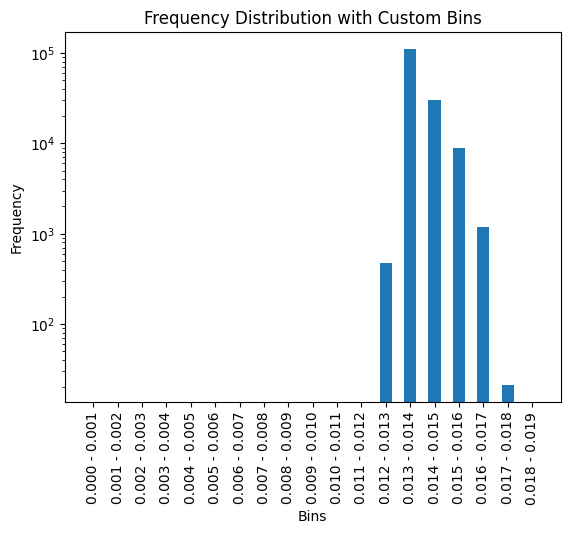

In [19]:
import numpy as np
import matplotlib.pyplot as plt

cell_type_of_interest = 'Bridge'
bridge_pred_norm = predicted_atac_processed[predicted_atac_processed.obs['cell_type'] == cell_type_of_interest]

expr_pred_norm = bridge_pred_norm.X.A.mean(axis=0)  # Using .A for sparse matrix
data = expr_pred_norm

# Define bins using np.arange() with a step of 0.01
bins = np.arange(0, 0.02, 0.001)

# Define labels for the bins in the format 'start - end'
labels = [f"{bins[i]:.3f} - {bins[i+1]:.3f}" for i in range(len(bins) - 1)]

# Display the labels
print(labels)
# Compute the histogram using numpy
hist, _ = np.histogram(data, bins=bins)

# Plot the histogram as a bar chart
plt.bar(range(len(hist)), hist, tick_label=labels, width=0.5)
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.yscale("log")
plt.title('Frequency Distribution with Custom Bins')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


In [11]:
ARI, AMI, NMI, HOM = calculate_cluster_index(R2A_predict)
print('RNA to ATAC:\nARI: %.3f, \tAMI: %.3f, \tNMI: %.3f, \tHOM: %.3f' % (ARI, AMI, NMI, HOM))

RNA to ATAC:
ARI: 0.196, 	AMI: 0.458, 	NMI: 0.461, 	HOM: 0.568


In [10]:
import scanpy
scanpy.pp.log1p(predicted_atac_processed)

['0.000 - 0.001', '0.001 - 0.002', '0.002 - 0.003', '0.003 - 0.004', '0.004 - 0.005', '0.005 - 0.006', '0.006 - 0.007', '0.007 - 0.008', '0.008 - 0.009', '0.009 - 0.010', '0.010 - 0.011', '0.011 - 0.012', '0.012 - 0.013', '0.013 - 0.014', '0.014 - 0.015', '0.015 - 0.016', '0.016 - 0.017', '0.017 - 0.018', '0.018 - 0.019']


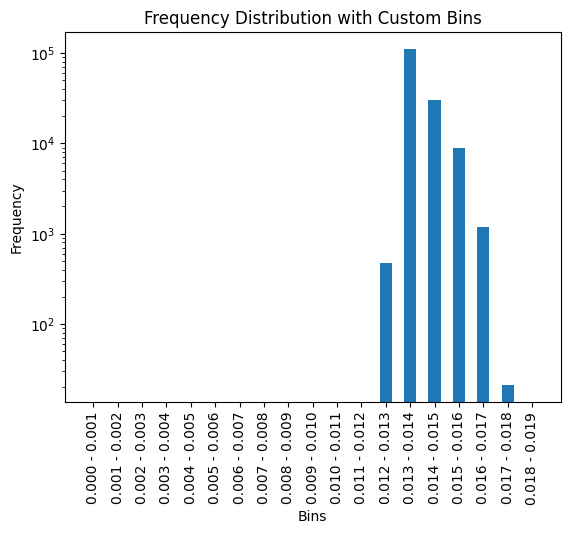

In [28]:
import numpy as np
import matplotlib.pyplot as plt

cell_type_of_interest = 'Bridge'
bridge_pred_norm_log1p = predicted_atac_processed[predicted_atac_processed.obs['cell_type'] == cell_type_of_interest]

expr_pred_norm_log1p = bridge_pred_norm_log1p.X.A.mean(axis=0)  # Using .A for sparse matrix
data = expr_pred_norm_log1p

# Define bins using np.arange() with a step of 0.01
bins = np.arange(0, 0.02, 0.001)

# Define labels for the bins in the format 'start - end'
labels = [f"{bins[i]:.3f} - {bins[i+1]:.3f}" for i in range(len(bins) - 1)]

# Display the labels
print(labels)
# Compute the histogram using numpy
hist, _ = np.histogram(data, bins=bins)

# Plot the histogram as a bar chart
plt.bar(range(len(hist)), hist, tick_label=labels, width=0.5)
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Frequency Distribution with Custom Bins')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


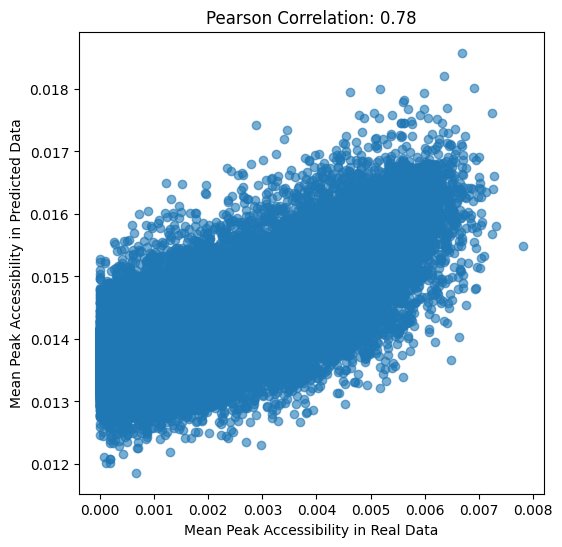

In [154]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Define cell type of interest
cell_type_of_interest = "late Neuroblasts"

# Subset based on cell type
bridge_real = ATAC_data[ATAC_data.obs['cell_type'] == cell_type_of_interest]
bridge_pred = R2A_predict[R2A_predict.obs['cell_type'] == cell_type_of_interest]


# Convert sparse matrix to dense and compute mean peak accessibility per peak
expr_real = bridge_real.X.A.mean(axis=0)  # Using .A for sparse matrix
expr_pred = bridge_pred.X.A.mean(axis=0)

# Compute Pearson correlation
corr, _ = pearsonr(expr_real, expr_pred)

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(expr_real, expr_pred, alpha=0.6)
plt.xlabel("Mean Peak Accessibility in Real Data")
plt.ylabel("Mean Peak Accessibility in Predicted Data")
plt.title(f"Pearson Correlation: {corr:.2f}")
plt.show()
